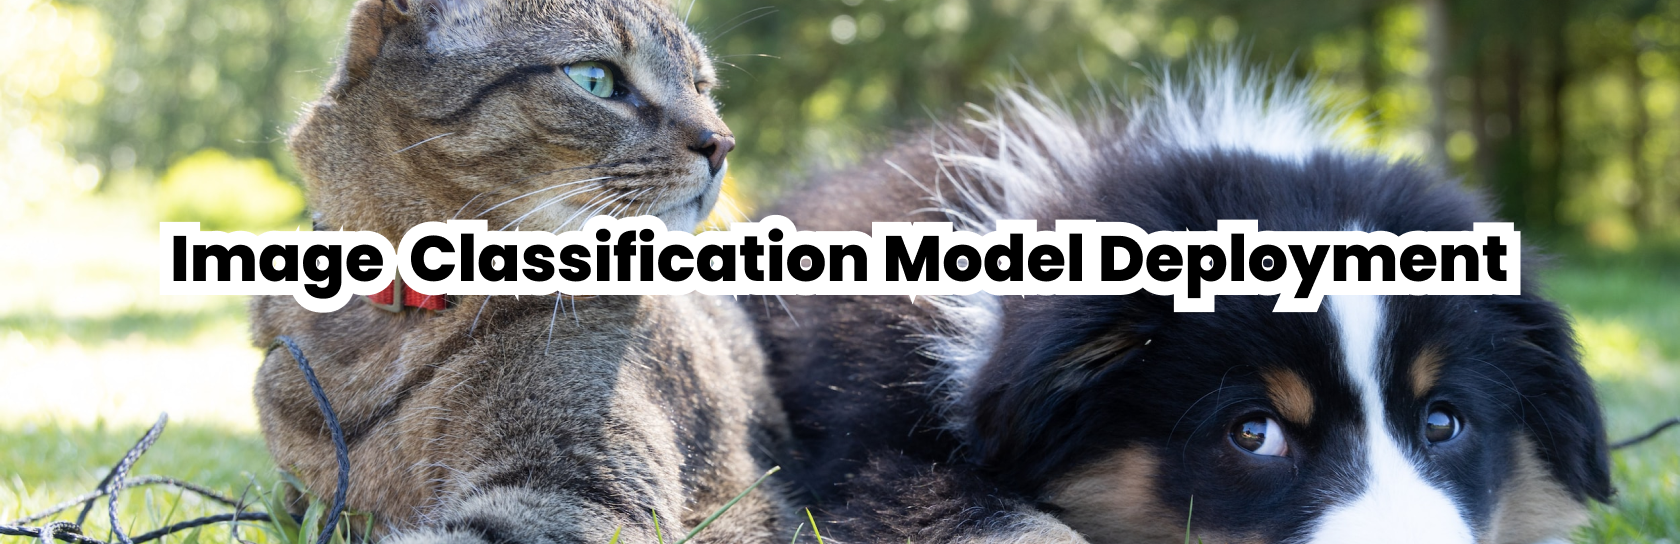

# Identitas

---

Nama: Nanda Lidya Fadillah

---

No. Registrasi: 1494037162100-195

---






# Pendahuluan
Berikut ini merupakan submission terakhir Image Classification Model Deployment

**Tujuan:** 
1. Dataset yang akan dipakai bebas, namun minimal memiliki 1000 buah gambar.
2. Dataset tidak pernah digunakan pada submission kelas machine learning sebelumnya.
3. Dataset dibagi menjadi 80% train set dan 20% test set.
4. Model harus menggunakan model sequential.
5. Model harus menggunakan Conv2D Maxpooling Layer.
6. Akurasi pada training dan validation set minimal sebesar 80%.
7. Menggunakan Callback.
8. Membuat plot terhadap akurasi dan loss model.
9. Menulis kode untuk menyimpan model ke dalam format TF-Lite.

Program

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fadillahnanda","key":"db5934e942f36729a3396049e2938b1c"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          10595        341  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           8436        273  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            677         23  1.0              
whenamancodes/credit-card-customers-prediction                  Credit Card Cust

In [7]:
!kaggle datasets download -d chetankv/dogs-cats-images

100% 433M/435M [00:03<00:00, 122MB/s]
100% 435M/435M [00:03<00:00, 127MB/s]


In [8]:
!unzip /content/dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

In [76]:
import os
import io
import openpyxl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files


import tensorflow as tf 
from tensorflow import keras
import keras_preprocessing 
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [77]:
cats_folder = os.path.join('/content/dataset/training_set/cats')   
dogs_folder = os.path.join('/content/dataset/training_set/dogs') 

print('Jumlah gambar Cats:', len(os.listdir(cats_folder)))    
print('Jumlah gambar Dogs:', len(os.listdir(dogs_folder)))    

filename_cats = os.listdir(cats_folder) 
print("\nNama file Cats:", filename_cats[:3])              
filename_dogs = os.listdir(dogs_folder)
print("Nama file Dogs:", filename_dogs[:3]) 

Jumlah gambar Cats: 4000
Jumlah gambar Dogs: 4000

Nama file Cats: ['cat.1869.jpg', 'cat.2286.jpg', 'cat.1001.jpg']
Nama file Dogs: ['dog.3019.jpg', 'dog.1177.jpg', 'dog.90.jpg']


In [78]:
train_cats = len(os.listdir("/content/dataset/training_set/cats"))
train_dogs = len(os.listdir("/content/dataset/training_set/dogs"))
print(f'The training dataset contains {train_cats} cat images and {train_dogs} dog images')

The training dataset contains 4000 cat images and 4000 dog images


In [79]:
test_cats = len(os.listdir("/content/dataset/test_set/cats"))
test_dogs = len(os.listdir("/content/dataset/test_set/dogs"))
print(f'The test dataset contains {test_cats} cat images and {test_dogs} dog images')

The test dataset contains 1000 cat images and 1000 dog images


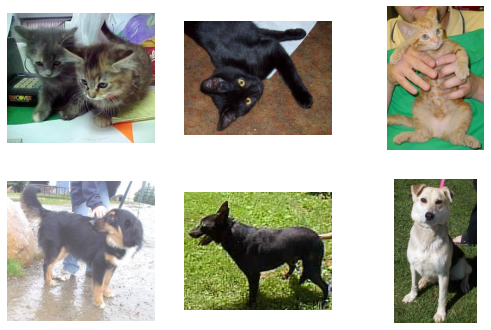

In [137]:
baris = 3
kolom = 3

picture_index = 0

fig=plt.gcf()
fig.set_size_inches(kolom *3, baris *3)

picture_index += 3
cats_pict = [os.path.join(cats_folder, fname) 
                  for fname in filename_cats[picture_index-3:picture_index]]
dogs_pict = [os.path.join(dogs_folder, fname) 
                  for fname in filename_dogs[picture_index-3:picture_index]]

for i, img_path in enumerate(cats_pict+dogs_pict):
  sp = plt.subplot(baris, kolom, i+1)
  sp.axis('off')

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [129]:
FOLDER_UTAMA='/content/dataset'
batch_size = 32
img_height=180
img_width=180

num_skipped = 0
for folder_name in ("/content/dataset/training_set/cats", "/content/dataset/training_set/dogs"):
    folder_path = os.path.join(FOLDER_UTAMA, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)
print("Deleted %d images" % num_skipped)

Deleted 0 images


In [150]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2,       
    shear_range=0.2,     
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode = 'nearest', 
    validation_split=0.2)

training_generator = training_datagen.flow_from_directory(
    FOLDER_UTAMA,
    target_size=(150,150),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training')

validation_generator = training_datagen.flow_from_directory(
    FOLDER_UTAMA,
    target_size=(150,150),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='validation')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [151]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [162]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',                                  
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 17, 17, 64)     

In [163]:
histori= model.fit(
    training_generator,
    steps_per_epoch=4,
    epochs=25,
    validation_data= validation_generator,
    validation_steps=4,
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/25
4/4 - 5s - loss: 0.7101 - accuracy: 0.7266 - val_loss: 0.6677 - val_accuracy: 0.8359 - 5s/epoch - 1s/step
Epoch 2/25
4/4 - 5s - loss: 0.6183 - accuracy: 0.7500 - val_loss: 0.5757 - val_accuracy: 0.7344 - 5s/epoch - 1s/step
Epoch 3/25
4/4 - 4s - loss: 0.5002 - accuracy: 0.8125 - val_loss: 0.5458 - val_accuracy: 0.7812 - 4s/epoch - 939ms/step
Epoch 4/25
4/4 - 4s - loss: 0.4630 - accuracy: 0.8281 - val_loss: 0.4707 - val_accuracy: 0.8281 - 4s/epoch - 922ms/step
Epoch 5/25
4/4 - 4s - loss: 0.5107 - accuracy: 0.7969 - val_loss: 0.4858 - val_accuracy: 0.8203 - 4s/epoch - 907ms/step
Epoch 6/25
4/4 - 4s - loss: 0.4905 - accuracy: 0.8203 - val_loss: 0.5450 - val_accuracy: 0.7812 - 4s/epoch - 932ms/step
Epoch 7/25

Akurasi telah mencapai >85%!
4/4 - 4s - loss: 0.3804 - accuracy: 0.8594 - val_loss: 0.5915 - val_accuracy: 0.7812 - 4s/epoch - 957ms/step


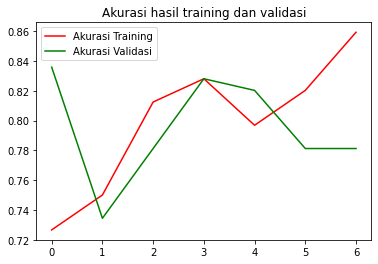

<Figure size 432x288 with 0 Axes>

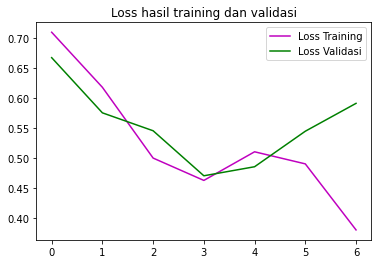

<Figure size 432x288 with 0 Axes>

In [165]:
acc=histori.history['accuracy']
val_acc= histori.history['val_accuracy']
loss = histori.history['loss']
val_loss= histori.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'g', label='Akurasi Validasi')
plt.title('Akurasi hasil training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'm', label='Loss Training')
plt.plot(epochs, val_loss, 'g', label='Loss Validasi')
plt.title('Loss hasil training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving dog.4001.jpg to dog.4001 (7).jpg
1/1 [==============================] - 0s 75ms/step
dog.4001.jpg
Ini adalah anjing


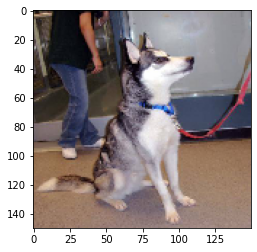

In [166]:
upload_gambar = files.upload()
for fn in upload_gambar.keys():
  #memprediksi gambar
  path = fn
  gambar= image.load_img(path, target_size=(150,150))

  plot_gambar=plt.imshow(gambar)
  x=image.img_to_array(gambar)
  x=np.expand_dims(x, axis=0)
  images=np.vstack([x])

  classes=model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Ini adalah kucing')
  elif classes[0][1]==1:
    print('Ini adalah anjing')
  else:
    print('Hewan tidak diketahui')

In [168]:
export_dir='saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

9837644